### Library-library yang digunakan

In [36]:
import pandas as pd 
import numpy as np 
from numpy import mean, std, percentile
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder 
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, RobustScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2


Berikut adalah tampilan 10 baris data yang ada di dalam dataset

In [37]:
df = pd.read_csv('Hasil TES SBK LPDP Gelombang 1 - 2021.csv', encoding ='latin1')
df.head(10)

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham
5,Targeted,S2,Luar Negeri,Dev,"Ya, dengan Loa",Ya,17,11,4,KU leuven
6,Afirmasi,S2,Dalam negeri,HUM,Tidak,Ya,17,16,4,Universitas Gadjah Mada
7,Reguler,S2,Dalam negeri,TRP,Tidak,Ya,14,19,4,NaN
8,Reguler,S2,Luar Negeri,AFR,"Ya, dengan Loa",Ya,13,16,7,Uni of Reading
9,Targeted,S3,Luar Negeri,BUS,Tidak,Ya,16,18,8,University of Auckland


In [38]:
df.shape

(431, 10)

Selanjutnya,disini kita akan mengecek apakah ada fitur yang memiliki nilai nan didalamnya

In [39]:
df.isnull().sum()

Jenis Beasiswa                                                                           0
Tingkat Pendidikan yang Dituju                                                           0
Negara Tujuan Kuliah                                                                     0
Bidang Studi yang dipilih saat mendaftar                                                 0
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                   0
Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?     0
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                           0
Jumlah Jawaban Benar pada Tes Kuantitatif                                                0
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                                          0
[optional] Kampus/universitas tujuan saat ini (pilihan 1)                               79
dtype: int64

Dari hasil pengecekan diatas, kita dapat melihat bahwa hampir keseluruhan fitur tidak memiliki nilai null, kecuali pada fitur terakhir yaitu fitur [ [optional] Kampus/universitas tujuan saat ini (pilihan 1)] sebanyak 79 nilai null yang terdeteksi   

Selanjutnya disini kita akan melihat nilai unik yang ada pada setiap fitur untuk mengidentifikasi langkah-langkah apa yang akan kita lakukan dalam melakukan cleaning data

In [40]:
for col in df:
    print(df[col].unique())

['Targeted' 'Reguler' 'Afirmasi']
['S2' 'S3']
['Dalam negeri' 'Luar Negeri']
['TRP' 'ENE' 'ELE' 'LIN' 'Dev' 'HUM' 'AFR' 'BUS' 'WAT' 'MAR' 'SOS' 'HOS'
 'STA' 'EDU' 'DEV' 'ICT' 'LAW' 'SGY' 'ACF' 'IPA' 'PHA' 'FOR' 'COM' 'DEF'
 'PUB' 'SOs' 'ATM' 'ENV' 'ENG' '-' 'CBS' 'CHE' 'KES' 'ECT' 'AER' 'ARC'
 'BIO' 'POL' 'Bus' 'M' 'Afr' 'SOC' 'MED' 'CIV' 'PSY' 'MET' 'ECO' 'Bio'
 'TEK' 'FOO' 'Tra' 'ART' 'ENT' 'Civ' 'TRA' 'GEO' 'LNY' 'BK' 'ETC' 'PHY'
 'INS' 'ACC' 'OCE' 'bus' 'MAT' 'Ipa' 'For' 'BuS' 'EAM' 'NUR' 'PTK' 'ANT'
 'CE' 'Trp' 'TEL' 'EDu' 'Hum' '0' 'arc' 'Psi' 'TP' 'TFM' 'AGB' 'Law' '718']
['Tidak' 'Ya, dengan Loa']
['Ya' 'Tidak']
[10 17 16 15 14 13 20 12 18 19 11  9  7  8 21  6 22  0 23]
[12 22 18  9 11 16 19 15 14 13 17 21  8 20  7 23 10  6 24  0  5  2 25]
[ 6  8  7  4  5  3  9  2 12 10  1  0]
['Universitas Indonesia' 'UCL' 'KTH Sweden' 'UGM'
 'University of Birmingham' 'KU leuven' 'Universitas Gadjah Mada' nan
 'Uni of Reading' 'University of Auckland' 'IHE Delft'
 'University of Michigan' 'Un

Dari hasil diatas, ada beberapa hal yang telah saya pertimbangkan untuk sementara dalam melakukan data cleaning, antara lain:
1. Kita akan mengubah kolom dengan nilai object/string menjadi numerik dengan melakukan encoder
2. Pada kolom indeks 4 dan 10, kita akan menjadikan seluruh huruf tersebut menjadi huruf kecil. Hal ini dikarenakan ada beberapa data yang harusnya berada pada kelas yang sama menjadi berbeda dikarenakan perbedaan huruf besar dan kecil. contoh fitur pada indeks 4 : TRP dan Trp harusnya satu kelas. jika tidak kita satukan maka saat kita melakukan encoder(perubahan data ke numerik), data tersebut akan berada di kelas yang berbeda
3. Pada fitur indeks 4, kita juga dapat melihat bahwa terdapat data dengan nilai yang tidak sesuai (bukan dalam bentuk abjad) seperti, '0', '718', dan '-'. Disini kita juga akan melihat apakah masuk akal data dengan nilai ini jika dilihat hubungannya dengan fitur-fitur lainnya. 

## Melakukan Cleaning Data

Disini kita akan melihat data yang tidak sesuai (bukan dalam bentuk abjad) yang telah disebutkan sebelumnya pada kolom indeks 4

In [41]:
df.loc[df['Bidang Studi yang dipilih saat mendaftar'].isin(['718', '0','-'])]

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
54,Afirmasi,S2,Dalam negeri,-,"Ya, dengan Loa",Ya,13,9,6,Universitas Pendidikan Indonesia
123,Targeted,S3,Dalam negeri,-,"Ya, dengan Loa",Ya,10,12,8,Universitas Airlangga
336,Afirmasi,S2,Dalam negeri,0,"Ya, dengan Loa",Ya,6,15,3,UM
426,Reguler,S2,Dalam negeri,718,Tidak,Tidak,23,25,12,UGM


In [42]:
df.iloc[:, [6,7,8]].max()

Jumlah Jawaban Benar pada Tes Penalaran Verbal     23
Jumlah Jawaban Benar pada Tes Kuantitatif          25
Jumlah Jawaban Benar pada Tes Pemecahan Masalah    12
dtype: int64

Dari hasil diatas terutama untuk baris 426, kita dapat melihat bahwa jumlah tes untuk penalaran verbal, kuantitatif, dan pemecahan masalah memiliki nilai paling besar diantara keseluruhan data lainnya namun dikategorikan tidak lulus. Dari sini kita dapat melihat bahwa kemungkinan besar bahwa data ini adalah kesalahan input. Oleh karena itu, disini saya menyimpulkan bahwa pada kolom "bidang studi yang dipilih saat mendaftar" dengan nilai '718' adalah missing value. Oleh karena itu, kita akan menghapus baris yang memiliki missing value. Namun untuk nilai '0' akan tetap saya biarkan karena ketika baris ini dihapus, maka akurasi model mengalami penurunan yang cukup signifikan. Sedangkan untuk '-' akan saya hapus karena dapat menambah tingkat akurasi model. 

#### Melakukan Marking Data

In [43]:
df['Bidang Studi yang dipilih saat mendaftar'] = df['Bidang Studi yang dipilih saat mendaftar'].replace(['-','718'], np.nan) 

#### Menghapus Missing value

In [44]:
df = df.loc[df['Bidang Studi yang dipilih saat mendaftar'].isin([np.nan]) == False]
df.reset_index(drop = True, inplace = True)

Selanjutnya, disini kita akan mengubah semua huruf yang ada pada fitur bidang studi dan optional kampus pilihan menjadi huruf kecil

In [45]:
df['Bidang Studi yang dipilih saat mendaftar'] = df['Bidang Studi yang dipilih saat mendaftar'].str.lower()
df['[optional] Kampus/universitas tujuan saat ini (pilihan 1)'] = df['[optional] Kampus/universitas tujuan saat ini (pilihan 1)'].str.lower()

#### Mengidentifikasi Data Pencilan (Outlier) pada data Numerik

Pada tahap ini kita akan mencoba mengidentifikasi nilai outlier pada data numerik yang ada pada fitur dengn nilai numerik, tepatnya pada fitur indeks 6,7, dan 8 dengan menggunakan IQR (Interquartile Range)

Pertama, sesuai dengan nama dari fiturnya, kita akan memasukkan tiap fitur kedalam variabel masing-masing dengan menentukan percentile 25 dan 75

In [46]:
q25_verbal, q75_verbal = percentile(df.iloc[:, [6]], 25), percentile(df.iloc[:, [6]], 75)
q25_kuanti, q75_kuanti = percentile(df.iloc[:, [7]], 25), percentile(df.iloc[:, [7]], 75)
q25_masalah, q75_masalah = percentile(df.iloc[:, [8]], 25), percentile(df.iloc[:, [8]], 75)


Selanjutnya, disini kita akan menentukan nilai iqr yaitu percentile 75 - percentile 25

In [47]:
iqr_verb = q75_verbal - q25_verbal
iqr_kuant = q75_kuanti - q25_kuanti
iqr_masal = q75_masalah - q25_masalah

print('Percentiles verbal: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_verbal, q75_verbal, iqr_verb))
print('Percentiles kuantitatif: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_kuanti, q75_kuanti, iqr_kuant))
print('Percentiles pemecahan masalah: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25_masalah, q75_masalah, iqr_masal))


Percentiles verbal: 25th=13.000, 75th=17.000, IQR=4.000
Percentiles kuantitatif: 25th=12.000, 75th=18.000, IQR=6.000
Percentiles pemecahan masalah: 25th=5.000, 75th=7.000, IQR=2.000


Selanjutnya, disini kita akan menentukan cut_off dari outlier yaitu dengan mengalikannya dengan 1.5. Disini kita juga akan menentukan lower dan upper data dari outlier dengan mengurangi nilai cut_off dengan nilai percentile

In [48]:
cut_off_1 = iqr_verb * 1.5
cut_off_2 = iqr_kuant * 1.5
cut_off_3 = iqr_masal * 1.5

lower1, upper1 =  q25_verbal - cut_off_1, q75_verbal + cut_off_1
lower2, upper2 =  q25_kuanti - cut_off_2, q75_kuanti + cut_off_2
lower3, upper3 =  q25_masalah - cut_off_3, q75_masalah + cut_off_3

Setelah perhitungan diatas, disini kita akan melakukan looping keseluruhan nilai yang ada pada ketiga fitur numerik ini dan mencari nilai outliernya berdasarkan lower dan upper yang sudah kita tetapkan

In [49]:
# identify outliers
outliers1 = [x for x in df['Jumlah Jawaban Benar pada Tes Penalaran Verbal'] if x < lower1 or x > upper1]
outliers2 = [x for x in df['Jumlah Jawaban Benar pada Tes Kuantitatif'] if x < lower2 or x > upper2]
outliers3 = [x for x in df['Jumlah Jawaban Benar pada Tes Pemecahan Masalah'] if x < lower3 or x > upper3]

print(outliers1)
print(outliers2)
print(outliers3)
      


[6, 0]
[0, 2]
[12, 1, 12, 12, 0]


Disini, kita akan mencoba melihat box-plot dari ketiga fitur numerik diatas untuk mengidentifikasi nilai outliernya dengan lebih jelas 

c:\users\yosia\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\yosia\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\yosia\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

<AxesSubplot:xlabel='Jumlah Jawaban Benar pada Tes Pemecahan Masalah'>

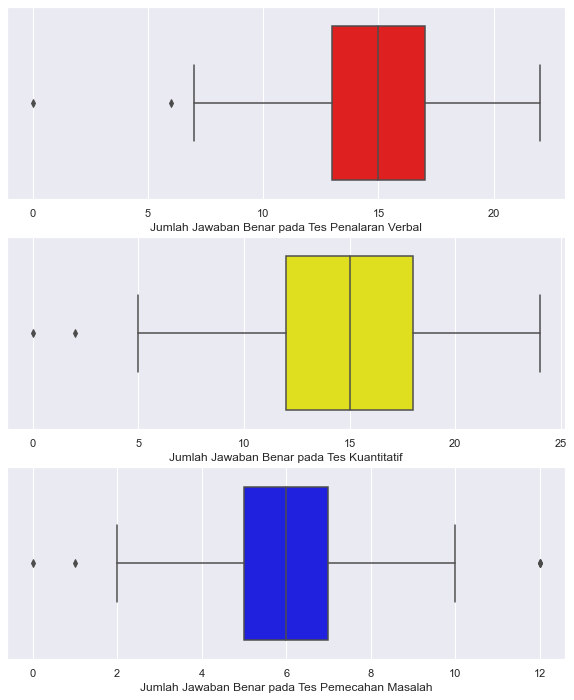

In [50]:
f, axes = plt.subplots(3, 1)

sns.set(rc={'figure.figsize':(10,12)})
sns.boxplot(df['Jumlah Jawaban Benar pada Tes Penalaran Verbal'], color='red', ax=axes[0])
sns.boxplot(df['Jumlah Jawaban Benar pada Tes Kuantitatif'], color='yellow', ax = axes[1])
sns.boxplot(df['Jumlah Jawaban Benar pada Tes Pemecahan Masalah'], color='blue', ax = axes[2])

Dari hasil visualisasi diatas, kita dapat melihat dengan jelas nilai outtlier yang berada pada ketiga fitur numerik diatas. Maka dari itu, sekarang kita akan menghapus baris yang memiliki nilai outlier tersebut

#### Melakukan Penghapusan nilai Outlier

In [51]:
df.loc[df['Jumlah Jawaban Benar pada Tes Pemecahan Masalah'].isin([0,12,1])]

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
68,Reguler,S2,Luar Negeri,dev,Tidak,Ya,16,18,12,mit
114,Reguler,S2,Luar Negeri,arc,"Ya, dengan Loa",Tidak,16,11,1,university of melbourne
190,Reguler,S2,Luar Negeri,com,Tidak,Tidak,13,7,12,lse
343,Afirmasi,S2,Dalam negeri,trp,Tidak,Ya,22,24,12,ugm
390,Afirmasi,S2,Dalam negeri,tp,Tidak,Tidak,0,0,0,universitas sebelas maret


Tampilan diatas adalah baris dengan fitur outlier yang berada pada fitur Tes pemecahan masalah. Kita dapat melihat pada baris ke 390 memiliki nilai tes dengan semuanya adalah nilai 0. Disini kita akan menghapus baris tersebut dan mengasumsikan baris dengan nilai outlier lain termasuk pada fitur tes penalaran verbal dan kuantitatif adalah outlier yang dapat membantu model dalam belajar dan menaikkan akurasi model. Sementara itu, dengan hanya menghapus baris yang memiliki nilai outlier 0, model kita juga mengalami kenaikan yang cukup signifkan. 

#### Melakukan Penghapusan nilai Outlier

In [52]:
df = df.loc[df['Jumlah Jawaban Benar pada Tes Pemecahan Masalah'].isin([0]) == False]
df.reset_index(drop = True, inplace = True)

In [53]:
df.loc[df['Jumlah Jawaban Benar pada Tes Pemecahan Masalah'].isin([0,1,12])]

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
68,Reguler,S2,Luar Negeri,dev,Tidak,Ya,16,18,12,mit
114,Reguler,S2,Luar Negeri,arc,"Ya, dengan Loa",Tidak,16,11,1,university of melbourne
190,Reguler,S2,Luar Negeri,com,Tidak,Tidak,13,7,12,lse
343,Afirmasi,S2,Dalam negeri,trp,Tidak,Ya,22,24,12,ugm


In [54]:
df.loc[df['Jumlah Jawaban Benar pada Tes Kuantitatif'].isin([2])]

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
399,Afirmasi,S2,Dalam negeri,bus,Tidak,Tidak,9,2,4,isi denpasar


In [55]:
df.loc[df['Jumlah Jawaban Benar pada Tes Penalaran Verbal'].isin([6])]

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
334,Afirmasi,S2,Dalam negeri,0,"Ya, dengan Loa",Ya,6,15,3,um


Dari hasil diatas, kita dapat melihat bahwa baris yang memiliki nilai outlier 0 sudah terhapus, sementara baris yang memiliki nilai outlier selain 0 masih kita pertahankan

#### Mengindetifikasi data Duplikat

In [56]:
# Mengecek data duplikat semua baris yang ada pada dataframe
duplicates = df.iloc[:, 0:].duplicated()

# Memberikan keterangan False jika tidak ada data duplikat dan True jika ada 
print(duplicates.any())

# Menampilkan baris yang memiliki data duplikat 
print(df[duplicates])

True
    Jenis Beasiswa Tingkat Pendidikan yang Dituju Negara Tujuan Kuliah  \
39        Targeted                             S2         Dalam negeri   
121        Reguler                             S2         Dalam negeri   
287       Targeted                             S2          Luar Negeri   
292       Targeted                             S2          Luar Negeri   
337       Afirmasi                             S2         Dalam negeri   
378       Afirmasi                             S2          Luar Negeri   
383       Targeted                             S2         Dalam negeri   
384       Targeted                             S2         Dalam negeri   

    Bidang Studi yang dipilih saat mendaftar  \
39                                       trp   
121                                        m   
287                                      pub   
292                                      soc   
337                                      ipa   
378                                     

#### Melakukan Penghapusan data Duplikat

In [57]:
# Melakukan penghapusan data duplikat 
df.drop_duplicates(inplace=True)

#  Mengecek kambali apakah masih ada data duplikat
duplicates = df.iloc[:, 0:].duplicated()
print(duplicates.any())

# Menampilkan baris yang memiliki data duplikat 
print(df[duplicates])

False
Empty DataFrame
Columns: [Jenis Beasiswa, Tingkat Pendidikan yang Dituju, Negara Tujuan Kuliah, Bidang Studi yang dipilih saat mendaftar, Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP, Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?, Jumlah Jawaban Benar pada Tes Penalaran Verbal, Jumlah Jawaban Benar pada Tes Kuantitatif, Jumlah Jawaban Benar pada Tes Pemecahan Masalah, [optional] Kampus/universitas tujuan saat ini (pilihan 1)]
Index: []


Dari hasil diatas, kita dapat melihat bahwa kita telah berhasil melakukan penghapusan data duplikat

### Menggunakan SImpleImputer() untuk melakukan imputasi data

Selanjutnya, disini kita akan memperhitungkan nilai nan yang ada pada fitur terakhir

Asumsi : Berdasarkan judul dari fitur tersebut yaitu [[optional] Kampus/universitas tujuan saat ini (pilihan 1)], fitur ini memiliki arti bahwa terdapat pilihan optional yang mana setiap murid dapat mengisi ataupun tidak mengisinya. Oleh karena itu, nilai nan disini berkemungkinan besar memiliki arti bahwa ada murid yang masih belum memiliki keputusan untuk menempuh universitas yang ingin ditujunya. Oleh karena itu, disini saya akan melakukan imputasi nilai null tersebut menjadi string 'belum'.  Disini kita akan menggunakan SimpleImputer() untuk melakukan imputasi data. Kita akan melakukan imputasi data ini setelah kita mendefinisikan input dan output, dan diimplementasikan kedalam ColumnsTransformer() di line-line selanjutnya dibawah ini.

## Mempersiapkan Model

#### Menentukan Input dan Output

Disini kita akan menggunakan fitur pada indeks 5 (dinyatakan lulus atau tidak) sebagai output dan sisanya sebagai input

In [58]:
X, y = df.iloc[:, [0,1,2,3,4,6,7,8,9]] ,  df.iloc[:, 5]
X.columns

Index(['Jenis Beasiswa', 'Tingkat Pendidikan yang Dituju',
       'Negara Tujuan Kuliah', 'Bidang Studi yang dipilih saat mendaftar',
       'Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP',
       'Jumlah Jawaban Benar pada Tes Penalaran Verbal',
       'Jumlah Jawaban Benar pada Tes Kuantitatif',
       'Jumlah Jawaban Benar pada Tes Pemecahan Masalah',
       '[optional] Kampus/universitas tujuan saat ini (pilihan 1)'],
      dtype='object')

#### Mendefinisikan fitur yang akan ditransformasi


- fitur input pada indeks 0, 1 akan kita encode menggunakan OneHotEncoder()
- fitur input pada indeks  2, 3, 4, 8 akan kita encode menggunakan OrdinalEncoder() dan untuk fitur ke 8 akan kita lakukan imputasi nilai nan menjadi 'belum' dengan SimpleImputer() 
- fitur output akan kita encode menggunakan LabelEncoder()

In [59]:
categorial_or_features= X.iloc[:, [2,3,4,8]].columns
categorial_oh_features = X.iloc[:, [0,1]].columns
y = LabelEncoder().fit_transform(y.astype('str'))

Selanjutnya, disini kita akan memasukkan variabel dari fitur yang telah kita definisikan sebelumnya kedalam sebuah list berserta dengan metode transformasi yang sudah ditetapkan

In [60]:
# pertama, kita akan menggunakan pipeline yang mana kita akan melakukan imputasi sekaligus OrdinalEncoder. 
#  Hal ini dilakukan karena fitur yang memiliki nilai nan (yang akan kita lakukan imputasi) terdapat pada fitur ke 8 

Ordinal_Imputer= Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='belum')), 
                                 ('my_or', OrdinalEncoder())
                                ])

#  memasukkan semua metode transformasi ke dalam sebuah list
trans = [  
             ('or', Ordinal_Imputer, categorial_or_features),
             ('oh', OneHotEncoder(), categorial_oh_features),
        ]


Disini, kita akan menggunakan library ColumnTransformer untuk melakukan transformasi fitur dengan metode-metode transformasi yang sudah kita persiapkan sebelumnya 

In [61]:
transformer = ColumnTransformer(transformers = trans, remainder = 'passthrough')
print(X.shape, y.shape)
X = transformer.fit_transform(X)
print(X.shape, y.shape)


(419, 9) (419,)
(419, 12) (419,)


Dari hasil diatas, kita dapat melihat bahwa kita telah berhasil melakukan transformasi fitur dengan melakukan encoder baik untuk input(X) maupun output(y). Kita dapat melihat bahwa shape awal; (419, 9), (419,) berubah menjadi (419, 12), (419,).

### Melakukan Seleksi fitur

Pertama, disini kita akan melihat keseluruhan score fitur X terhadap y menggunakan metode chi2. 

In [62]:
#  membuat X menjadi sebuah dataframe
X = pd.DataFrame(X)

# membuat sebuah fungsi untuk melakukan seleksi fitur dengan chi2
def select_features(X, y):
    fs = SelectKBest(score_func = chi2, k='all')
    fs.fit(X,y)
    X = fs.transform(X)
    return X, fs
X,fs = select_features(X,y)

#  mencari nilai score dari setiap fitur-fitur yang ada
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 3.057665
Feature 1: 3.196814
Feature 2: 0.116686
Feature 3: 32.181670
Feature 4: 7.234129
Feature 5: 9.287495
Feature 6: 4.654475
Feature 7: 0.169895
Feature 8: 1.199069
Feature 9: 13.479844
Feature 10: 115.401397
Feature 11: 3.420854


Dari hasil diatas, kita dapat melihat bahwa score paling tinggi dimiliki oleh fitur indeks 10, yang mana fitur tersebut adalah fitur Tes Kuantitatif. Secara keseluruhan, kita dapat melihat terdapat beberapa nilai yang cukup kecil yaitu berada pada score 0-3,2 (fitur 0, 1, 2, 7, 8). Oleh karena itu, berdasarkan hasil seleksi fitur ini, kita hanya akan mengambil 7 fitur dengan score terbaik dari 13 fitur yang ada  

Feature 0: 32.181670
Feature 1: 7.234129
Feature 2: 9.287495
Feature 3: 4.654475
Feature 4: 13.479844
Feature 5: 115.401397
Feature 6: 3.420854


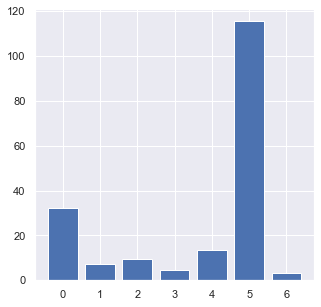

In [64]:
def select_features_(X, y):
    fs_ = SelectKBest(score_func = chi2, k=7)
    fs_.fit(X,y)
    X = fs_.transform(X)
    return X, fs_
X,fs_ = select_features_(X,y)

# what are scores for the features
for i in range(len(fs_.scores_)):
    print('Feature %d: %f' % (i, fs_.scores_[i]))
# plot the scores
plt.figure(figsize=(5, 5))
plt.bar([i for i in range(len(fs_.scores_))], fs_.scores_)
plt.plot()
plt.show()


Dari hasil diatas, kita dapat melihat bahwa kita telah berhasil mengambil 7 fitur dengan score terbaik. Kita juga dapat melihat tampilan scorenya melalui visualisasi diagram batang diatas. 

Selanjutnya, disini kita akan melakukan Transformasi fitur numerik yang ada pada dataset (fitur pada 3 indeks terakhir). Kita akan menggunakan QuantileTransformer() dan PowerTransformer()

In [65]:
#  Pertama, kita akan membuat X menjadi sebuah dataframe
X = pd.DataFrame(X)

# tampilan fitur numerik yang ada pada dataset(Fitur Tes Penalaran verbal, kuantitatif, dan pemecahan masalah)
X.iloc[:, -3:]

,4,5,6
0,10.0,12.0,6.0
1,17.0,22.0,8.0
2,16.0,18.0,7.0
3,15.0,12.0,4.0
4,16.0,9.0,7.0
...,...,...,...
414,15.0,5.0,5.0
415,14.0,14.0,6.0
416,15.0,7.0,9.0
417,17.0,11.0,6.0


 Mendefinisikan dan memasukkan fitur yang akan ditransformasi beserta metodenya kedalam sebuah list

In [66]:
numerical_features = X.iloc[:, -3:].columns

trans = [  
              ('qu', QuantileTransformer(n_quantiles=200, output_distribution='normal'), numerical_features),
              ('power', PowerTransformer(method='box-cox'), numerical_features)     
        ]

Menggunakan ColumnTransformer() untuk merealisasikan isi list yang telah kita buat pada line sebelumnya

In [67]:
transformer = ColumnTransformer(transformers = trans, remainder = 'passthrough')
print(X.shape, y.shape)
X = transformer.fit_transform(X)
print(X.shape, y.shape)

(419, 7) (419,)
(419, 10) (419,)


Dari hasil diatas, kita telah berhasil melakukan transformasi fitur, yang mana ukuran dataset kita telah berubah dari (419, 7), (419,) menjadi (419,10),(419,)

### Menentukan algoritma model yang akan digunakan

Disini kita akan menggunakan model SVC() untuk melakukan prediksi apakah seorang murid dinyatakan lulus atau tidak berdasarkan input dan output yang telah kita tetapkan sebelumnya. Disini saya menggunakan kernel 'linear' yang berarti kita akan memisahkan data secara linear, yaitu dengan menggunakan satu garis linear

In [68]:
model = SVC(kernel ='linear') 

Disini kita akan mengunakan RepeatedStratifiedKFold dengan parameter ang telah ditentukan dibawah ini untuk mencari rata-rata akurasi dari model yang telah kita buat. Disini kita juga akan menggunakan pipeline untuk menggabungkan RobustScaler() dengan model kita (Intinya kita melakukan scaling dengan RobustScaler() terhadap data yang telah kita olah, dan data hasil scaling tersebut langsung dapat kita cari akurasinya dengan model yang kita gunakan )

In [69]:
# Menggunakan repeatedstratifiedKFold()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state= 1)
pipeline = Pipeline(steps = [('rc', RobustScaler()),('m', model)])

# Mencari nilai rata-rata akurasi dengan cross_val_score
n_scores = cross_val_score(pipeline, X, y, scoring ='accuracy', cv=cv, n_jobs = -1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.916 (0.046)


Dari hasil diatas, kita dapat melihat bahwa akurasi model kita mencapai 91.6 % dengan standar deviasi 0.046. Disini kita dapat melihat bahwa model kita sudah mendapat akurasi yang cukup tinggi

### Melakukan Prediksi terhadap X

In [70]:
# Melakukan fitting model terhadap X dan y 
pipeline.fit(X,y)
# Melkaukan prediksi terhadap X
yhat = pipeline.predict(X)
yhat[:11]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

10 data awal untuk y

In [71]:
y[:11]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

Dari hasil diatas, kita dapat melihat bahwa untuk 10 baris pertama, model kita dapat memprediksi hasil yang ada pada kolom output sebelumnya(y) dengan benar.  